# Data loading and preprocessing

In [167]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [168]:
import torch
import torchvision

## Read the csv image data train and test using pandas

In [169]:
train_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [170]:
train_data.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
test_data.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0


### Explore some features of the dataset


In [172]:
print(train_data.columns)
print(test_data.columns)
print(train_data.shape)
print(test_data.shape)
# excluding the label column
print(f"Min value of train dataset is {train_data.iloc[0].min()}\nMin value of test dataset is {test_data.iloc[0].min()}")
print(f"Max value of train dataset is {train_data.iloc[0].max()}\nMax value of test dataset is {test_data.iloc[0].max()}")

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
(60000, 785)
(10000, 785)
Min value of train dataset is 0
Min value of test dataset is 0
Max value of train dataset is 255
Max value of test dataset is 255


## Preprocess the data 
* Normalise values to be in range [0-1]
* Convert the image to be in shape 28, 28 for our model

In [173]:
def preprocess(data):
    images = data.iloc[:, 1:]/255
    labels = data['label']
    return images, labels
    
train_images, train_labels = preprocess(train_data)
test_images, test_labels = preprocess(test_data)

In [174]:
# after preprocessing
print(train_images.columns)
print(test_images.columns)
print(train_images.shape)
print(test_images.shape)
# excluding the label column
print(f"Min value of train dataset is {train_images.iloc[0].min()}\nMin value of test dataset is {test_images.iloc[0].min()}")
print(f"Max value of train dataset is {train_images.iloc[0].max()}\nMax value of test dataset is {test_images.iloc[0].max()}")

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)
Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)
(60000, 784)
(10000, 784)
Min value of train dataset is 0.0
Min value of test dataset is 0.0
Max value of train dataset is 1.0
Max value of test dataset is 1.0


In [175]:
# image = np.array(train_images.iloc[0]).reshape(28,28)

In [176]:
# import matplotlib.pyplot as plt
# plt.imshow(image, cmap='gray')
# plt.title("shirt")
# plt.show()

In [177]:
# ls=[]    
# for i in range(3):
#     ls.append(np.array([im for im in train_images.iloc[i,:]]).reshape(28,28))
# print(np.array(ls[0]).shape)
# plt.imshow(ls[1], cmap='gray')

In [178]:
import torchvision.transforms as transforms

train_transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=(30, 70)),
])


In [179]:
 def dataloader(data, labels, batch_size=64, train=True):
    if data.shape[0] == len(labels):
        for i in range(0, data.shape[0], batch_size):
            batch_data = []
            batch_labels = []
            for j in range(i, min(i+batch_size, data.shape[0])):
                image_data = torch.tensor([im for im in data.iloc[j,:]], dtype=torch.float).reshape(28,28)
                if train==True:
                    transformed_image = train_transform(image_data.unsqueeze(dim=0)).squeeze()
                    batch_data.append(transformed_image)
                else:
                    batch_data.append(image_data.clone().detach())
                batch_labels.append(torch.tensor(labels.iloc[j]))
            # yield torch.tensor(batch_data), batch_labels   
            yield torch.cat([x.unsqueeze(0) for x in batch_data]), torch.tensor(batch_labels)


In [180]:
train_dataloader = dataloader(train_images, train_labels, train=False)
test_dataloader = dataloader(test_images, test_labels, train=False)


In [181]:
# Convert the dataloader to a list
train_dataloader = list(train_dataloader)
test_dataloader = list(test_dataloader)

In [182]:
len(test_dataloader)
len(train_dataloader)

938

In [183]:
# def calculate_dataloader_size(data_loader):
#     count=0
#     while True:
#         try:
#             next(data_loader)
#             count+=1
#         except Exception as e:
#             break
#     print(f"size of {data_loader} is {count}")

# calculate_dataloader_size(train_dataloader)
# calculate_dataloader_size(test_dataloader)

# View Images

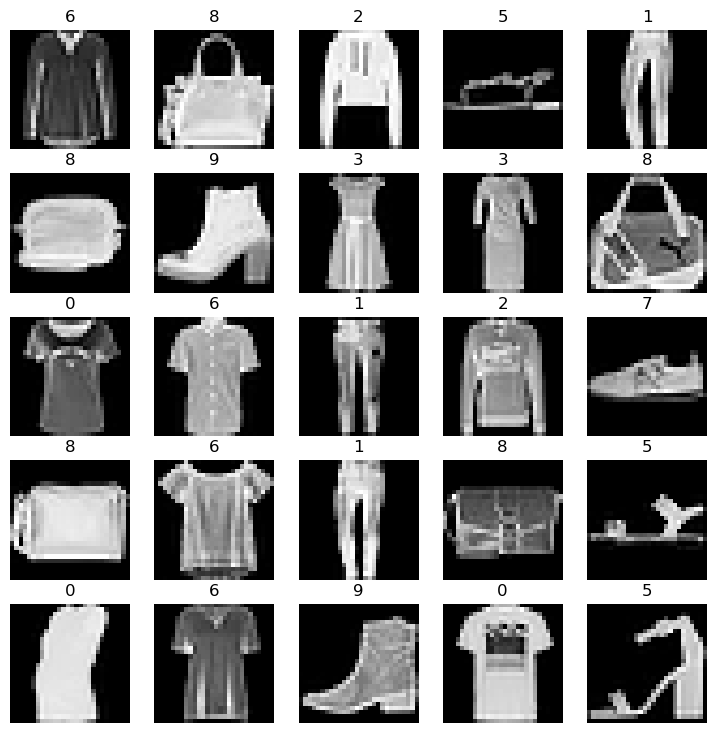

In [184]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 5, 5
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_dataloader), size=[1]).item()
    random_idx1 = torch.randint(0, 64, size=[1]).item()
    img, label = train_dataloader[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img[random_idx1].squeeze(), cmap="gray")
    plt.title(label[random_idx1].item())
    plt.axis(False);

# CNN

In [185]:
import torch
import torch.nn as nn

In [186]:
class FashionMNISTModelV1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=1),
            nn.ReLU()
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=84, kernel_size=5, stride=1, padding=1),
            nn.ReLU()
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(in_channels=84, out_channels=100, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block5 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=1600, out_features=10),
            #nn.Softmax(dim=1)
        )
       

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        return x


In [187]:
# modular train_step
from tqdm.auto import tqdm
def train_step(
    model: torch.nn.Module,
    dataloader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    device:torch.device
):
    # Put model in train mode
    model.train()
    
    # Setup loss and accuracy
    train_loss, train_acc = 0, 0
    
    # Loop throught the data
    for batch, (X, y) in enumerate(tqdm(dataloader)):
        # Send data to device gpu or cpu
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model.forward(X.unsqueeze(dim=1))
        
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Calculate accuracy across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/ len(y_pred)
        
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    
    return train_loss, train_acc

In [188]:

#  create test step
def test_step(model: torch.nn.Module,
    dataloader,
    loss_fn: torch.nn.Module,
    device: torch.device
):
    # Put model in eval mode
    model.eval()
    
    # Setup test loss and accuracy
    test_loss, test_acc = 0, 0
    
    # Inference mode or with torch.no_grad()
    with torch.inference_mode():
        # Loop through data
        for batch, (X, y) in enumerate(dataloader):
            # Send code to device
            X , y = X.to(device), y.to(device)
        
            # 1. Forward pass
            test_pred = model.forward(X.unsqueeze(dim=1))
            
            # 2. Calculate loss
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
            # 3. Calculate accuracy
            test_pred_labels = test_pred.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [189]:
def train(
    model: torch.nn.Module,
    train_dataloader,
    test_dataloader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module,
    epochs: int,
    device: torch.device     
):
    # Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # Loop through data or epochs
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        
        # Test the model on unseen data
        test_loss, test_acc = test_step(model=model,
                                       dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device
                                       )
        
        # Print the loss and accuracy
        print(f"Epoch {epoch+1} | ",
              f"Train_loss {train_loss:.4f} | ",
              f"Train_acc {train_acc:.4f} | ",
              f"Test_loss {test_loss:.4f} | ",
              f"Test_acc {test_acc:.4f}"
        )
        
        # update the results
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [190]:
from pathlib import Path
def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
    # Create target directory
    target_dir_path = Path(target_dir)
    target_dir_path.mkdir(parents=True,
                        exist_ok=True)

    # Create model save path
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
    model_save_path = target_dir_path / model_name

    # Save the model state_dict()
    print(f"[INFO] Saving model to: {model_save_path}")
    torch.save(obj=model.state_dict(),
             f=model_save_path)

In [192]:
from timeit import default_timer as timer
def initiate_training(lr_degrade=False):
    # Set random seeds
    torch.manual_seed(42) 
    torch.cuda.manual_seed(42)
    
    # Set up device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Avilable device is {device}")
    
    # Set number of epochs
    EPOCHS = 15

    # Create model instance
    model_1 = FashionMNISTModelV1().to(device)
    
    # Setup loss function and optimizer
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

    # Start the timer 
    start_time = timer()
    
    # Train model_0 
    model_1_results = train(model=model_1, 
                            train_dataloader=train_dataloader,
                            test_dataloader=test_dataloader,
                            optimizer=optimizer,
                            loss_fn=loss_fn, 
                            epochs=EPOCHS,
                            device=device)

    # End the timer and print out how long it took
    end_time = timer()
    
    print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

    # Save the model
    save_model(model=model_1,
               target_dir="",
               model_name="FashionMNIST_CNN.pth")

In [193]:
initiate_training()

Avilable device is cuda


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1 |  Train_loss 0.6276 |  Train_acc 0.7855 |  Test_loss 0.4016 |  Test_acc 0.8498


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2 |  Train_loss 0.3986 |  Train_acc 0.8546 |  Test_loss 0.3695 |  Test_acc 0.8630


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3 |  Train_loss 0.3870 |  Train_acc 0.8579 |  Test_loss 0.3772 |  Test_acc 0.8576


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4 |  Train_loss 0.3705 |  Train_acc 0.8638 |  Test_loss 0.3571 |  Test_acc 0.8646


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5 |  Train_loss 0.3663 |  Train_acc 0.8651 |  Test_loss 0.3628 |  Test_acc 0.8654


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 6 |  Train_loss 0.3593 |  Train_acc 0.8682 |  Test_loss 0.3586 |  Test_acc 0.8646


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 7 |  Train_loss 0.3589 |  Train_acc 0.8688 |  Test_loss 0.3640 |  Test_acc 0.8684


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 8 |  Train_loss 0.3612 |  Train_acc 0.8682 |  Test_loss 0.3591 |  Test_acc 0.8707


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 9 |  Train_loss 0.3596 |  Train_acc 0.8679 |  Test_loss 0.3613 |  Test_acc 0.8712


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10 |  Train_loss 0.3464 |  Train_acc 0.8736 |  Test_loss 0.3849 |  Test_acc 0.8657


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 11 |  Train_loss 0.3511 |  Train_acc 0.8710 |  Test_loss 0.3591 |  Test_acc 0.8678


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 12 |  Train_loss 0.3485 |  Train_acc 0.8722 |  Test_loss 0.3508 |  Test_acc 0.8689


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 13 |  Train_loss 0.3456 |  Train_acc 0.8717 |  Test_loss 0.3480 |  Test_acc 0.8712


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 14 |  Train_loss 0.3488 |  Train_acc 0.8719 |  Test_loss 0.3426 |  Test_acc 0.8765


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 15 |  Train_loss 0.3420 |  Train_acc 0.8737 |  Test_loss 0.3950 |  Test_acc 0.8609
[INFO] Total training time: 81.480 seconds
[INFO] Saving model to: FashionMNIST_CNN.pth


* lr 0.1 for 5 epoch
* lr 0.01 for 5 epochs
* lr 0.001 for 5 epochs
* lr 0.0001 for 5epochs

In [194]:
from tqdm.auto import tqdm
def test_model(model, device):

    # Make predictions on the entire test dataset
    test_preds = []
    model.eval()
    
    with torch.inference_mode():
      # Loop through the batches in the test dataloader
      for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        # Pass the data through the model
        test_logits = model(X.unsqueeze(dim=1))

        # Convert the pred logits to pred probs
        pred_probs = torch.softmax(test_logits, dim=1)

        # Convert the pred probs into pred labels
        pred_labels = torch.argmax(pred_probs, dim=1)

        # Add the pred labels to test preds list
        test_preds.append(pred_labels)

    # Concatenate the test preds and put them on the CPU
    test_preds = torch.cat(test_preds).cpu()
    return test_preds

In [195]:
# Test the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = FashionMNISTModelV1().to(device)
model.load_state_dict(torch.load('FashionMNIST_CNN.pth'))

test_preds = test_model(model, device)

  0%|          | 0/157 [00:00<?, ?it/s]

In [196]:
test_truth = torch.cat([y for X, y in test_dataloader])
test_truth
print(len(test_preds))
print(len(test_truth))
print(test_preds.shape, test_truth.shape)

10000
10000
torch.Size([10000]) torch.Size([10000])


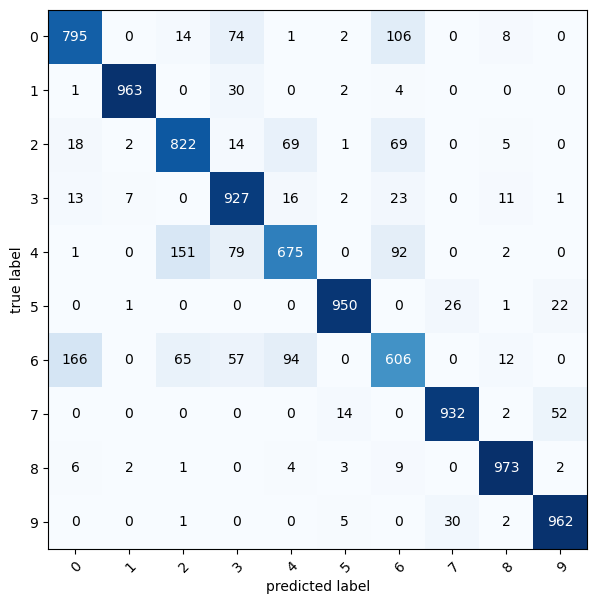

In [197]:

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
class_name = [0,1,2,3,4,5,6,7,8,9]
# Setup confusion matrix instance
confmat = ConfusionMatrix(num_classes=len(class_name) ,task="multiclass")
confmat_tensor = confmat(preds=test_preds,
                         target=test_truth)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_name,
    figsize=(10, 7)
)